In [1]:
import tensorflow as tf
import numpy as np

A. Get the Data

In [2]:
(unsup_images, unsup_labels), (sup_images, sup_labels) = tf.keras.datasets.fashion_mnist.load_data()

unsupervised_meetkumar = {'images': unsup_images[:60000]}
supervised_meetkumar = {'images':sup_images,'labels':sup_labels}


4422102/4422102 [==============================] - 0s 0us/step


B. Data Pre-processing

In [3]:
unsup_images = unsup_images / 255.0
sup_images = sup_images / 255.0

unsupervised_meetkumar['images'] = unsup_images[:60000]
supervised_meetkumar['images'] = sup_images

print("Unsupervised dataset size:", unsupervised_meetkumar['images'].shape)
print("Supervised dataset size:", supervised_meetkumar['images'].shape)

unsup_labels = tf.keras.utils.to_categorical(unsup_labels, num_classes=10)
sup_labels = tf.keras.utils.to_categorical(sup_labels, num_classes=10)

supervised_meetkumar['labels'] = sup_labels

Unsupervised dataset size: (60000, 28, 28)
Supervised dataset size: (10000, 28, 28)


In [4]:
print("Supervised labels shape size:",supervised_meetkumar['labels'].shape)

Supervised labels shape size: (10000, 10)


C. Data Preparation (Training, Validation, Testing)

In [5]:
from sklearn.model_selection import train_test_split

unsupervised_train_meetkumar, unsupervised_val_meetkumar = train_test_split(unsupervised_meetkumar['images'], test_size=0.05, random_state=41)

print(unsupervised_train_meetkumar.shape)
print(unsupervised_val_meetkumar.shape)

supervised_meetkumar['images'],x_discarded,supervised_meetkumar['labels'],y_discarded  = train_test_split(supervised_meetkumar['images'],supervised_meetkumar['labels'], test_size=0.7, random_state=60)

print(supervised_meetkumar['images'].shape)
print(supervised_meetkumar['labels'].shape)

x_train_meetkumar,x_test_meetkumar,y_train_meetkumar,y_test_meetkumar = train_test_split(supervised_meetkumar['images'],supervised_meetkumar['labels'],test_size=0.4,random_state=60)

x_test_meetkumar,x_val_meetkumar,y_test_meetkumar,y_val_meetkumar = train_test_split(x_test_meetkumar,y_test_meetkumar,test_size=0.5,random_state=41)

print('The Shape of Unsupervised Training is : ', unsupervised_train_meetkumar.shape)
print('The Shape of Unsupervised Validation is : ', unsupervised_val_meetkumar.shape)
print('The Shape of Supervised x_training is : ', x_train_meetkumar.shape)
print('The Shape of Supervised y_training is : ', y_train_meetkumar.shape)
print('The Shape of Supervised x_Validation is : ', x_val_meetkumar.shape)
print('The Shape of Supervised y_Validation is : ', y_val_meetkumar.shape)
print('The Shape of Supervised x_testing is : ', x_test_meetkumar.shape)
print('The Shape of Supervised y_testing is : ', y_test_meetkumar.shape)

(57000, 28, 28)
(3000, 28, 28)
(3000, 28, 28)
(3000, 10)
The Shape of Unsupervised Training is :  (57000, 28, 28)
The Shape of Unsupervised Validation is :  (3000, 28, 28)
The Shape of Supervised x_training is :  (1800, 28, 28)
The Shape of Supervised y_training is :  (1800, 10)
The Shape of Supervised x_Validation is :  (600, 28, 28)
The Shape of Supervised y_Validation is :  (600, 10)
The Shape of Supervised x_testing is :  (600, 28, 28)
The Shape of Supervised y_testing is :  (600, 10)


D. Build, Train, and Validate a baseline CNN Model

In [6]:
cnn_v1_model_meetkumar = tf.keras.models.Sequential()
cnn_v1_model_meetkumar.add(tf.keras.layers.Conv2D(16,(3,3), activation='relu',strides=2,padding='same',input_shape=(28,28,1)))
cnn_v1_model_meetkumar.add(tf.keras.layers.Conv2D(8,(3,3), strides=2, activation='relu',padding='same'))
cnn_v1_model_meetkumar.add(tf.keras.layers.Flatten())
cnn_v1_model_meetkumar.add(tf.keras.layers.Dense(100, activation='relu'))
cnn_v1_model_meetkumar.add(tf.keras.layers.Dense(10, activation='softmax'))

cnn_v1_model_meetkumar.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

cnn_v1_model_meetkumar.summary()

tf.keras.utils.plot_model(cnn_v1_model_meetkumar, show_shapes=True, show_layer_names=True)

cnn_v1_history_meetkumar = cnn_v1_model_meetkumar.fit(x_train_meetkumar,y_train_meetkumar,epochs=10,batch_size=256,validation_data=(x_val_meetkumar,y_val_meetkumar))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense (Dense)               (None, 100)               39300     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 41,630
Trainable params: 41,630
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
8/8 [==============================] - 15

E. Test and analyze the baseline model

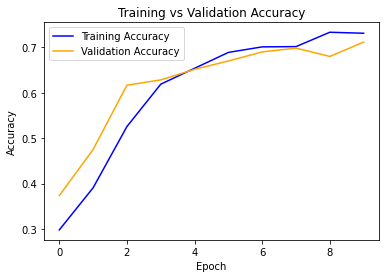

Test accuracy: 0.7149999737739563
19/19 [==============================] - 0s 2ms/step


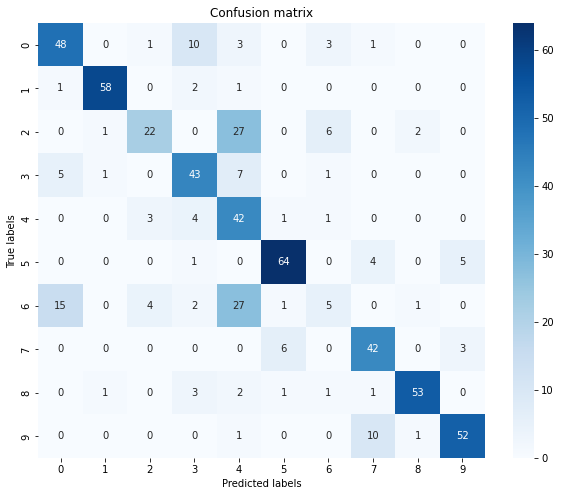

In [7]:
import matplotlib.pyplot as plt
train_acc = cnn_v1_history_meetkumar.history['accuracy']
val_acc_baseline = cnn_v1_history_meetkumar.history['val_accuracy']

plt.plot(train_acc, color='blue', label='Training Accuracy')
plt.plot(val_acc_baseline, color='orange', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

test_loss, test_accuracy = cnn_v1_model_meetkumar.evaluate(x_test_meetkumar, y_test_meetkumar, verbose=0)
print('Test accuracy:', test_accuracy)

cnn_predictions_meetkumar = cnn_v1_model_meetkumar.predict(x_test_meetkumar)

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Convert the one-hot encoded labels to integers
y_test_int = np.argmax(y_test_meetkumar, axis=1)
y_pred_int = np.argmax(cnn_predictions_meetkumar, axis=1)

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_test_int, y_pred_int)

# Plot the confusion matrix using matplotlib
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

F. Add random noise to unsupervised dataset

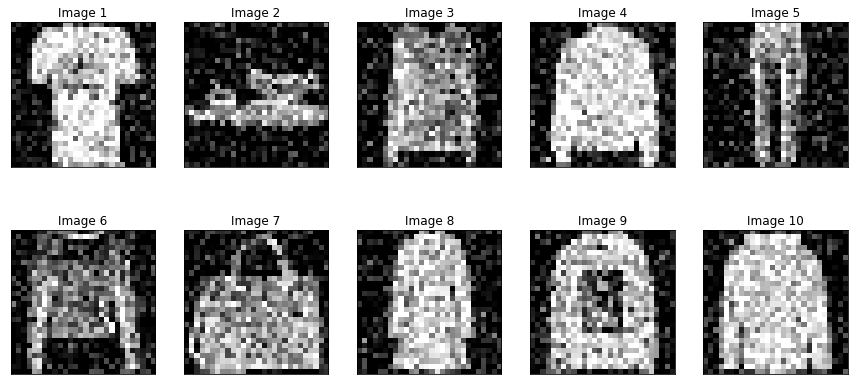

(1800, 28, 28)
(600, 28, 28)


In [8]:
noise_factor = 0.2
x_train_noisy_meetkumar = x_train_meetkumar + noise_factor * tf.random.normal(shape=x_train_meetkumar.shape,seed=41)
x_val_noisy_meetkumar = x_val_meetkumar + noise_factor * tf.random.normal(shape=x_val_meetkumar.shape,seed=41)

# Clip the values to ensure they fall within the range [0, 1]
x_train_noisy_meetkumar = tf.clip_by_value(x_train_noisy_meetkumar, clip_value_min=0.0, clip_value_max=1.0)
x_val_noisy_meetkumar = tf.clip_by_value(x_val_noisy_meetkumar, clip_value_min=0.0, clip_value_max=1.0)

# plot first 10 images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 7))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_val_noisy_meetkumar[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Image {i+1}')
plt.show()

print(x_train_noisy_meetkumar.shape)
print(x_val_noisy_meetkumar.shape)

G. Build and pretrain Autoencoder

Model: "autoencoder_meetkumar"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs_meetkumar (InputLaye  [(None, 28, 28, 1)]      0         
 r)                                                              
                                                                 
 e_conv1_meetkumar (Conv2D)  (None, 14, 14, 16)        160       
                                                                 
 e_conv2_meetkumar (Conv2D)  (None, 7, 7, 8)           1160      
                                                                 
 d_conv1_meetkumar (Conv2DTr  (None, 14, 14, 8)        584       
 anspose)                                                        
                                                                 
 d_conv2_meetkumar (Conv2DTr  (None, 28, 28, 16)       1168      
 anspose)                                                        
                                             

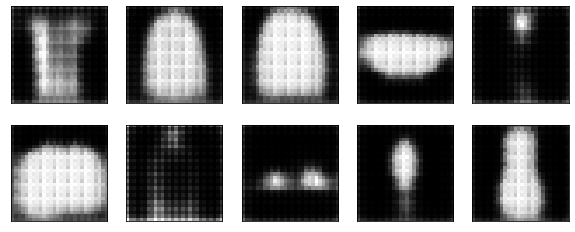

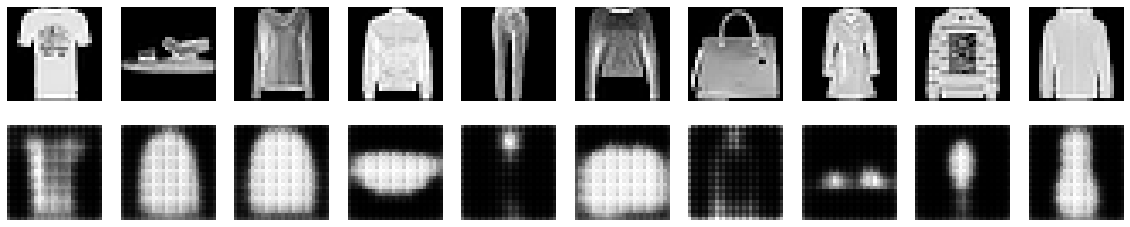

In [9]:
inputs_meetkumar = tf.keras.layers.Input(shape=(28,28,1), name='inputs_meetkumar')

# Encoder Section
e_meetkumar = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2, name='e_conv1_meetkumar')(inputs_meetkumar)
e_meetkumar = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2, name='e_conv2_meetkumar')(e_meetkumar)

# Decoder Section
d_meetkumar = tf.keras.layers.Conv2DTranspose(8, (3, 3), activation='relu', padding='same', strides=2, name='d_conv1_meetkumar')(e_meetkumar)
d_meetkumar = tf.keras.layers.Conv2DTranspose(16, (3, 3), activation='relu', padding='same', strides=2, name='d_conv2_meetkumar')(d_meetkumar)
outputs_meetkumar = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same', name='outputs_meetkumar')(d_meetkumar)

# Define the autoencoder model
autoencoder_meetkumar = tf.keras.Model(inputs=inputs_meetkumar, outputs=outputs_meetkumar, name='autoencoder_meetkumar')

autoencoder_meetkumar.compile(loss='MSE',optimizer='adam',metrics=['accuracy'])

# Display the model summary
autoencoder_meetkumar.summary()

tf.keras.utils.plot_model(autoencoder_meetkumar, show_shapes=True, show_layer_names=True)

cnn_v1_history_meetkumar = autoencoder_meetkumar.fit(x_train_noisy_meetkumar, x_train_meetkumar, epochs=10, batch_size=256, shuffle=True, validation_data=(x_val_noisy_meetkumar, x_val_meetkumar))

autoencoder_predictions_meetkumar = autoencoder_meetkumar.predict(unsupervised_val_meetkumar)

image_prediction = autoencoder_predictions_meetkumar[:10]

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(np.mean(image_prediction[i], axis=2), cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

fig, axs = plt.subplots(2, 10, figsize=(20, 4))
for i in range(10):
    # Original image
    axs[0, i].imshow(x_val_meetkumar[i], cmap='gray')
    axs[0, i].axis('off')
    # Predicted image
    axs[1, i].imshow(autoencoder_predictions_meetkumar[i].reshape(28,28), cmap='gray')
    axs[1, i].axis('off')
plt.show()

H. Build and perform transfer learning on a CNN with the Autoencoder

In [10]:
import tensorflow.keras
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense
from tensorflow.keras.models import Model

# Define input layer
inputs_meetkumar = Input(shape=(28,28,1))

# Define encoder section of autoencoder as first layer
e_meetkumar = Conv2D(16, kernel_size=3, activation='relu', padding='same', strides=2)(inputs_meetkumar)
e_meetkumar = Conv2D(8, kernel_size=3, activation='relu', padding='same', strides=2)(e_meetkumar)

# Flatten output from encoder
flatten_meetkumar = Flatten()(e_meetkumar)

# Define fully connected layer with 100 neurons
fc_meetkumar = Dense(100, activation='relu')(flatten_meetkumar)

# Define output layer
outputs_meetkumar = Dense(10, activation='softmax')(fc_meetkumar)

# Define the model
cnn_v2_meetkumar = Model(inputs=inputs_meetkumar, outputs=outputs_meetkumar)

cnn_v2_meetkumar.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

print(cnn_v2_meetkumar.summary())

tf.keras.utils.plot_model(cnn_v2_meetkumar, show_shapes=True, show_layer_names=True)

cnn_v2_history_meetkumar = cnn_v2_meetkumar.fit(x_train_meetkumar,y_train_meetkumar, epochs=10, batch_size=256, shuffle=True, validation_data=(x_val_meetkumar, y_val_meetkumar))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 flatten_1 (Flatten)         (None, 392)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               39300     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 41,630
Trainable params: 41,630
Non-trainable p

I. Test and analyze the pretrained CNN model

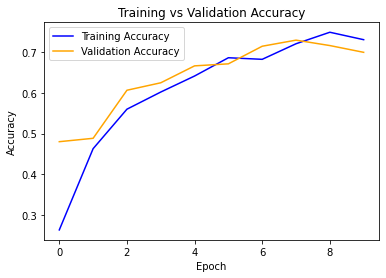

19/19 [==============================] - 0s 3ms/step
Test accuracy: 0.7066666483879089


In [11]:
import matplotlib.pyplot as plt
train_acc = cnn_v2_history_meetkumar.history['accuracy']
val_acc = cnn_v2_history_meetkumar.history['val_accuracy']

plt.plot(train_acc, color='blue', label='Training Accuracy')
plt.plot(val_acc, color='orange', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

cnn_predictions_meetkumar = cnn_v2_meetkumar.predict(x_test_meetkumar)

test_loss, test_accuracy = cnn_v2_meetkumar.evaluate(x_test_meetkumar, y_test_meetkumar, verbose=0)
print('Test accuracy:', test_accuracy)

19/19 [==============================] - 0s 3ms/step
Test accuracy: 0.7066666483879089


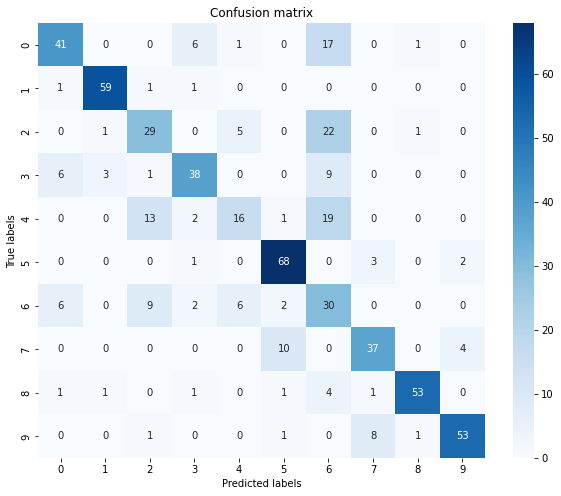

In [12]:
cnn_predictions_meetkumar = cnn_v2_meetkumar.predict(x_test_meetkumar)

test_loss, test_accuracy = cnn_v2_meetkumar.evaluate(x_test_meetkumar, y_test_meetkumar, verbose=0)
print('Test accuracy:', test_accuracy)

# Convert the one-hot encoded labels to integers
y_test_int = np.argmax(y_test_meetkumar, axis=1)
y_pred_int = np.argmax(cnn_predictions_meetkumar, axis=1)

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_test_int, y_pred_int)

# Plot the confusion matrix using matplotlib
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()


J. Compare the performance of the baseline CNN model to the pretrained model in your report

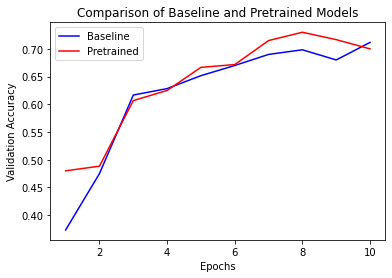

In [13]:
# Train baseline model and store validation accuracy
val_acc_pretrained = val_acc
# Plot validation accuracy of baseline and pretrained models
import matplotlib.pyplot as plt

epochs_range = range(1, 10+1)
plt.plot(epochs_range, val_acc_baseline, 'b', label='Baseline')
plt.plot(epochs_range, val_acc_pretrained, 'r', label='Pretrained')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Comparison of Baseline and Pretrained Models')
plt.legend()
plt.show()